<a href="https://colab.research.google.com/github/dvircohen0/GAN/blob/main/Latent_Semantic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:

Word_lemmatizer = WordNetLemmatizer()
titles = [line.rstrip() for line in open("all_book_titles.txt")]
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

def tokenizer(text):
    text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [Word_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

for title in titles:
    try:
        all_titles.append(title)
        tokens = tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index +=1
                index_word_map.append(token)
    except: 
        pass
   

In [ ]:
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] =1
    return x 
       
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((N,D))
i = 0

for tokens in all_tokens:
    X[i,:] = tokens_to_vector(tokens)
    i +=1

svd = TruncatedSVD()
Z = svd.fit_transform(X)



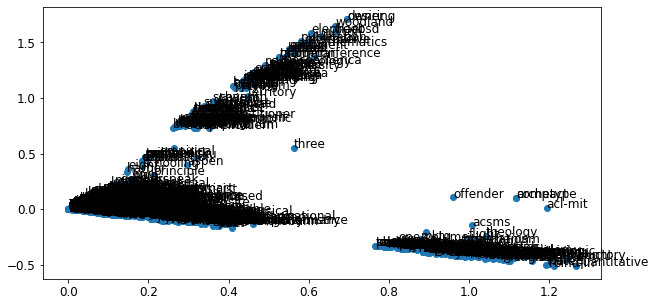

In [49]:
plt.scatter(Z[:,0], Z[:,1])
for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.rcParams.update({'font.size': 12})
    plt.rcParams["figure.figsize"] = (10,5)
plt.show()